

# CSCI 3202, Spring 2020:  Assignment 5
### Due:  Friday 17 April 2020 by 11:59 PM

### Your name: Alex Book

---



---
## Problem 1: Navigating an awkward situation with grace and poise

<img src='https://www.explainxkcd.com/wiki/images/5/5f/interaction.png' style="width: 600px;"/>


Suppose you are at a social event where you would like to avoid any interaction with a large number of the other attendees. It's not that you don't like them, it's just that you don't like *talking to* them. A few of your good friends are also in attendance, but they are tucked away in a corner. The rectangular room in which the event is being held spans gridcells at $x=1,2,\ldots, 6$ and $y=1,2,\ldots, 5$. At the eastern edge ($x=6$) of this first floor room, there is a balcony, with a 6-foot drop. If the event becomes unbearably awkward, you can jump off the balcony and run away. Of course, this might hurt a little bit, so we should incorporate this into our reward structure.

The terminal states and rewards associated with them are given in the diagram below. The states are represented as $(x,y)$ tuples. The available actions in non-terminal states include moving exactly 1 unit North (+y), South (-y), East (+x) or West (-x), although you should not include walking into walls, because that would be embarrassing in front of all these other people. Represent actions as one of 'N', 'S', 'E', or 'W'. For now, assume all non-terminal states have a default reward of -0.01, and use a discount factor of 0.99.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/hw06_mdp.png" style="width: 400px;"/>

Use the following transition model for this decision process, if you are trying to move from state $s$ to state $s'$:
* you successfully move from $s$ to $s'$ with probability 0.6
* the remaining 0.4 probability is spread equally likely across state $s$ **and** all adjacent (N/S/E/W) states except for $s'$. Note that this does not necessarily mean that all adjacent states have 0.1, because some states do not have 4 adjacent states.


### (1a)

Complete the `MDP` class below. The docstring comments provide some desired specifications. You may add additional methods or attributes, if you would like.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import unittest
from pprint import pprint

In [8]:
class MDP:
    def __init__(self, nrow, ncol, terminal, default_reward, discount):
        '''Create/store the following attributes:
        states -- list of all the states (x,y) tuples
        terminal_states -- is a dictionary with terminal state keys, and rewards as values
        default_reward -- is the reward for being in any non-terminal state
        df -- discount factor
        ... and anything else you decide will be useful!
        '''
        
        # your code goes here...
        self.nrow = nrow
        self.ncol = ncol
        self.states = []
        for i in range(ncol):
            for j in range(nrow):
                self.states.append((i+1,j+1))
        self.terminal_states = terminal
        self.default_reward = default_reward
        self.df = discount
        self.utility = [[x+y for x in range(ncol+1)] for y in range(nrow+1)]
        for a in range(1):
            for b in range(1):
                self.utility[a][b] = 0
        
        

    def actions(self, state):
        '''Return a list of available actions from the given state.
        [None] are the actions available from a terminal state.
        '''
        
        # your code goes here...
        if state in self.terminal_states:
            return [None]
        else:
            ret = []
            if state[1] != self.nrow:
                ret.append('N')
            if state[1] != 1:
                ret.append('S')
            if state[0] != self.ncol:
                ret.append('E')
            if state[0] != 1:
                ret.append('W')
            return ret
        
        
    def reward(self, state):
        '''Return the reward for being in the given state'''
        
        # your code goes here...
        if state in self.terminal_states:
            return self.terminal_states[state]
        else:
            return self.default_reward
        
    def result(self, state, action):
        '''Return the resulting state (as a tuple) from doing the given
        action in the given state, without uncertainty. Uncertainty
        is incorporated into the transition method.
        state -- a tuple representing the current state
        action -- one of N, S, E or W, as a string
        '''
    
        # your code goes here...
        if state in self.terminal_states:
            return
        if action == 'N':
            return (state[0], state[1]+1)
        elif action == 'S':
            return (state[0], state[1]-1)
        elif action == 'E':
            return (state[0]+1, state[1])
        elif action == 'W':
            return (state[0]-1, state[1])
        else:
            return state
        
                
    def transition(self, state, action):
        '''Return the probabilities and subsequent states associated
        with taking the given action from the given state. Can be done
        however you want, so that it works with your value/policy iteration.
        '''
        
        # your code goes here...
        if action is None:
            return [(0, state)]
        
        else:
            ret = [(.6, self.result(state, action))] # .6 prob. for desired action
            
            acts = self.actions(state) # get possible actions at state
            acts.append(None)
            acts.remove(action) # remove desired action
            count = len(acts) # number of undesired actions (+1 for staying put)
            
            for act in acts:
                ret.append((.4/count, self.result(state, act)))
            
            return ret
        
        

**Now:** create an `MDP` object to represent the decision process in this problem.

To test and get comfortable with your `MDP` class methods and attributes, and making the relevant calculations with this structure, calculate the expected utility of walking north from (1,1). Assume initially that all states $(x,y)$ have a utility of $x+y$ (including the terminal states).

In [9]:
ex = MDP(nrow = 5, ncol = 6, terminal = {(2,1):-1,
                                         (3,1):-1,
                                         (6,1):-5,
                                         (6,2):-5,
                                         (1,3):-1,
                                         (4,3):-1,
                                         (6,3):-5,
                                         (1,4):2,
                                         (3,4):-1,
                                         (4,4):-1,
                                         (6,4):-5,
                                         (1,5):2,
                                         (3,5):1,
                                         (6,5):-5
                                        }, default_reward = -.01, discount = .99)
next_states = ex.transition((1,1), 'N')
expected_utility = np.sum([p*(x+y) for p, (x, y) in next_states])
print('Expected utility:', expected_utility)

Expected utility: 2.8


#### Unit tests
Note that these are non-exhaustive, because there is some flexibility in how the `transition` method works.

In [10]:
tests_to_run = unittest.TestLoader().loadTestsFromModule(Tests_Problem1())
unittest.TextTestRunner().run(tests_to_run)

......
----------------------------------------------------------------------
Ran 6 tests in 0.003s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

### (1b)

Implement value iteration to calculate the utilities for each state.  Also implement a function that takes as arguments an `MDP` object and a dictionary of state-utility pairs (key-value) and returns a dictionary for the optimal policy.  The optimal policy dictionary should have state tuples as keys and the optimal move (None, N, S, E or W) as values.

In [11]:
def value_iteration(mdp, tol=1e-3):
    
    # your code goes here...
    df = mdp.df
    utility_new = {state : 0 for state in mdp.states}
    
    while True:
        utility_old = utility_new.copy()
        
        max_change = 0
        
        for s in mdp.states:
            next_states = [mdp.transition(s, a) for a in mdp.actions(s)]
            
            best_utility = -float('inf')
            
            for k in range(len(next_states)):
                newsum = sum([next_states[k][j][0]*utility_old[next_states[k][j][1]] for j in range(len(next_states[k]))])
                best_utility = max(best_utility, newsum)
                if len(next_states)==1:
                    best_utility = newsum
            
            utility_new[s] = mdp.reward(s) + df*best_utility
            
            max_change = max(max_change, abs(utility_new[s]-utility_old[s]))
            
        if (df == 1 and max_change < tol) or max_change < tol*(1-df)/df:
            break
            
    return utility_new

def find_policy(mdp, utility):
    
    # your code goes here...
    policy = {state: None for state in mdp.states}
    
    for s in mdp.states:
        
        best_utility = (-float('inf'), None)
    
        # loop over actions, find which gives the highest expected utility
        for a in mdp.actions(s):

            # calculate the expected utility of action a from state s
            newsum = sum([p*utility[s2] for p, s2 in mdp.transition(s,a)])

            # if this action has higher expected utility than the current best,
            # replace the best (utility, action) tuple with this one
            if newsum > best_utility[0]:
                best_utility = (newsum, a)

        # now we have the action (second element) that leads
        # to the highest expected utility (first element)
        policy[s] = best_utility[1]
    
    return policy
    

In [12]:
ex2 = MDP(nrow = 5, ncol = 6, terminal = {(2,1):-1,
                                         (3,1):-1,
                                         (6,1):-5,
                                         (6,2):-5,
                                         (1,3):-1,
                                         (4,3):-1,
                                         (6,3):-5,
                                         (1,4):2,
                                         (3,4):-1,
                                         (4,4):-1,
                                         (6,4):-5,
                                         (1,5):2,
                                         (3,5):1,
                                         (6,5):-5
                                        }, default_reward = -.01, discount = .99)

utility_new = value_iteration(ex2, tol=1e-3)
policy_new = find_policy(ex2, utility_new)

Now actually use your `value_iteration` and `find_policy` functions to calculate the utility for each state in this MDP, and the optimal action in each state.

As a sanity check, print the utilities of these terminal states:
1. `utility[(1,5)]`
1. `utility[(6,1)]`

and print the utility of these states that are nearby to terminal states, so their utilities should be similar to the nearby terminal states' utilities:
1. `utility[(2,5)]`
1. `utility[(5,3)]`

And print the policy for these states to make sure they make sense:
1. `policy[(2,4)]`
1. `policy[(1,1)]`

In [13]:
print('utility[(1,5)]:', utility_new[(1, 5)])
print('utility[(6,1)]:', utility_new[(6, 1)])
print('utility[(2,5)]:', utility_new[(2, 5)])
print('utility[(5,3)]:', utility_new[(5, 3)])
print('policy[(2,4)]:', policy_new[(2, 4)])
print('policy[(1,1)]:', policy_new[(1, 1)])

utility[(1,5)]: 2.0
utility[(6,1)]: -5.0
utility[(2,5)]: 1.736700293304454
utility[(5,3)]: -1.3900301151516992
policy[(2,4)]: W
policy[(1,1)]: N


### (1c)

If we enter the room at (5,1), what is the optimal path for us to follow?  Create a graphic to illustrate this policy pathway, either by generating a plot in Python (like the maze solution path) or by uploading a hand-drawn image and including it below.

**Note:** In case of an error with the image, the path is as follows:
(5,1) $\rightarrow$ (4,1) $\rightarrow$ (4,2) $\rightarrow$ (3,2) $\rightarrow$ (2,2) $\rightarrow$ (2,3) $\rightarrow$ (2,4) $\rightarrow$ (1,4) *exit*\
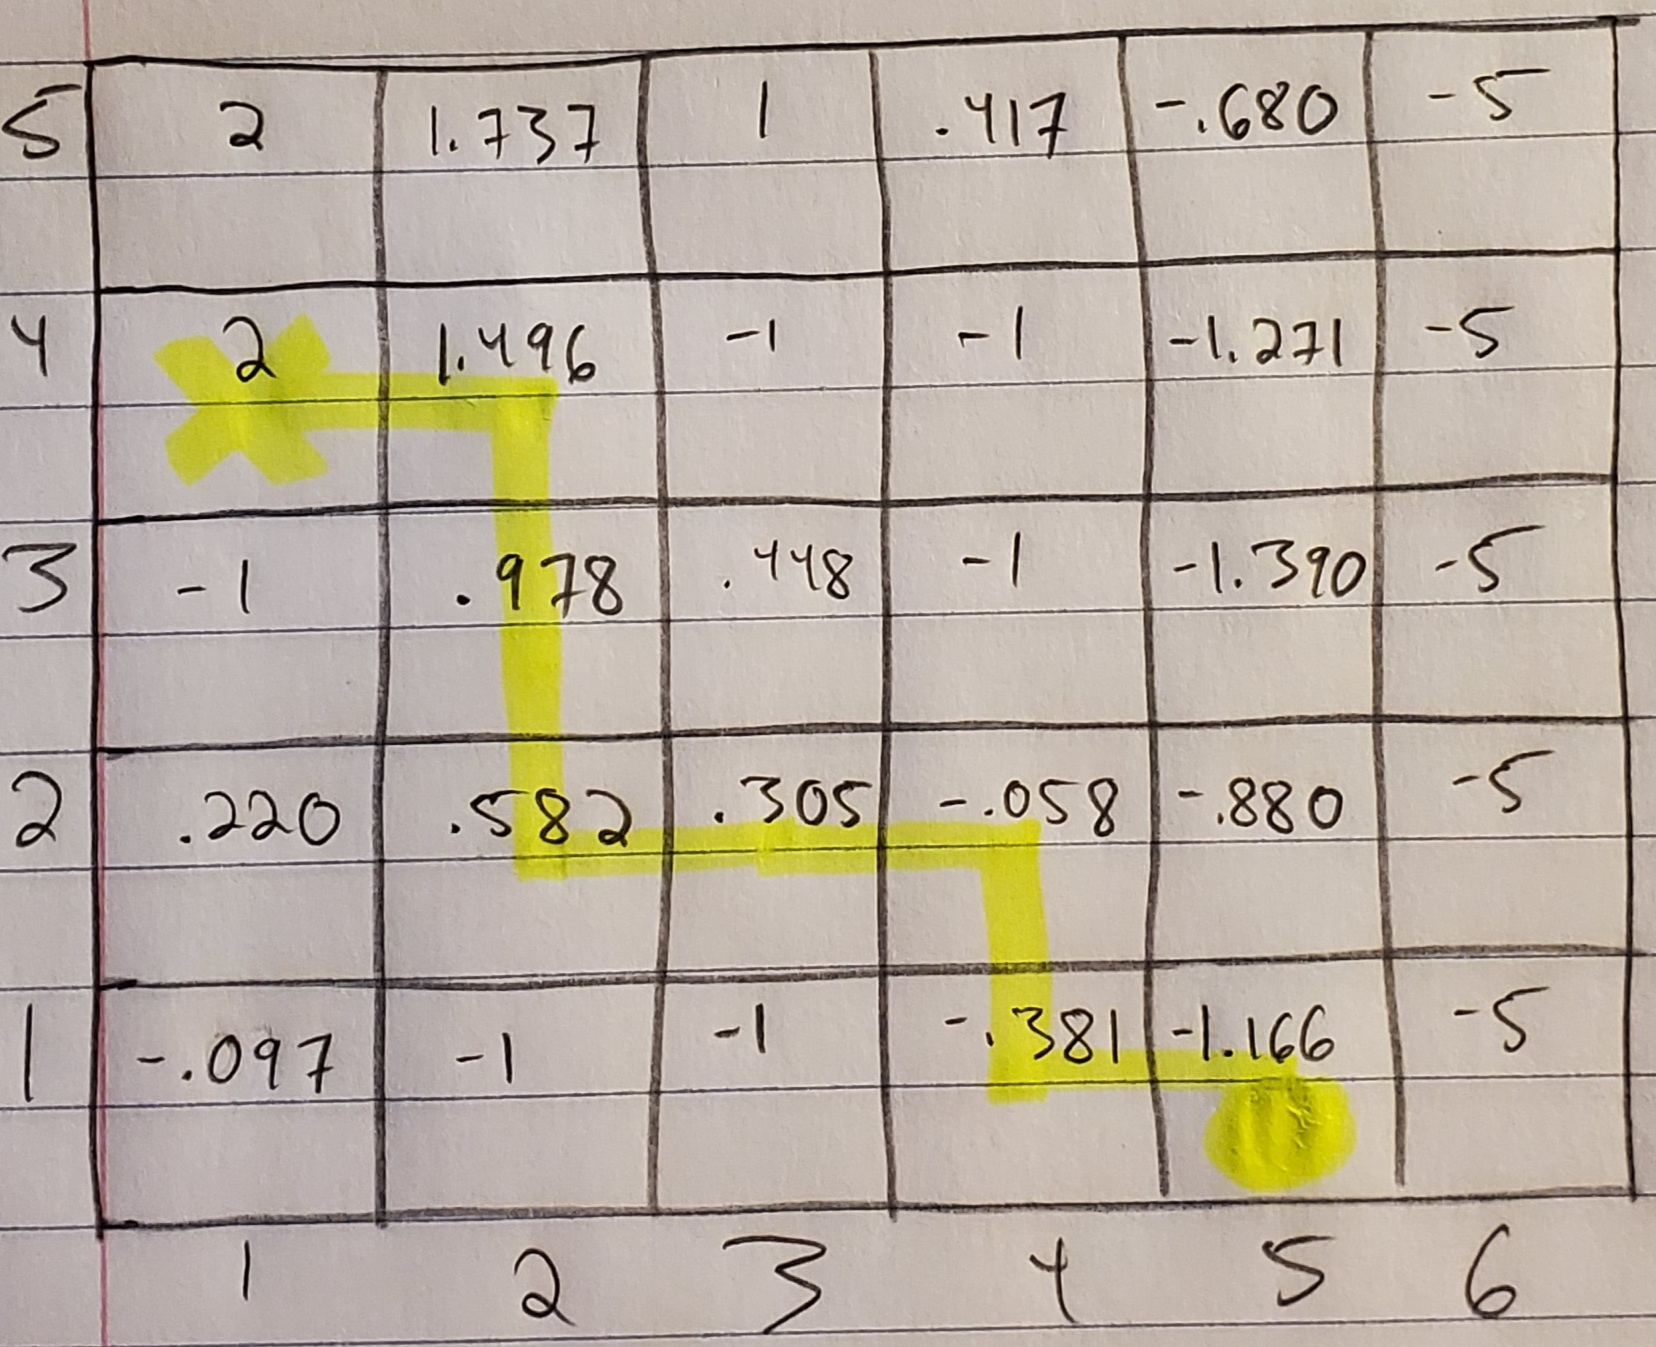

### (1d)

From (3,2) the optimal move is to walk West. If we are trying to go talk to our friends in the Northwest corner, why would we rather do this than walk North first, then West?

Moving West then North maximizes path utility (.582 then .978 vs. .448 then .978), so we should do this walk rather than walking North then West.

### (1e)

How painfully awkward do you need to set the default reward for non-terminal states before the optimal move from (5,1) becomes jumping off the balcony immediately and running away?  Round your answer to two decimal places.

In [14]:
z = -.01
while z > -100:
    ex3 = MDP(nrow = 5, ncol = 6, terminal = {(2,1):-1,
                                             (3,1):-1,
                                             (6,1):-5,
                                             (6,2):-5,
                                             (1,3):-1,
                                             (4,3):-1,
                                             (6,3):-5,
                                             (1,4):2,
                                             (3,4):-1,
                                             (4,4):-1,
                                             (6,4):-5,
                                             (1,5):2,
                                             (3,5):1,
                                             (6,5):-5
                                            }, default_reward = z, discount = .99)
    utility_new3 = value_iteration(ex3, tol=1e-3)
    policy_new3 = find_policy(ex3, utility_new3)
    if policy_new3[(5,1)] == 'E':
        print('default reward:', round(z,2))
        break
    z-=.01

default reward: -2.09


### (1f)

In **1e** we assumed a certain level of loss (negative reward) just for being present.  But a more realistic approach might be to instead change the reward structure for the terminal states. Consider the terminal states with -1 reward in the default model. Let $R^*$ denote the reward associated with these states. How low does $R^*$ need to be in order for us to immediately jump off the balcony and run away? Use the default non-terminal state reward of -0.01. Write a few sentences interpreting your result.

In [15]:
R = -1
while R > -30:
    ex3 = MDP(nrow = 5, ncol = 6, terminal = {(2,1):R,
                                             (3,1):R,
                                             (6,1):-5,
                                             (6,2):-5,
                                             (1,3):R,
                                             (4,3):R,
                                             (6,3):-5,
                                             (1,4):2,
                                             (3,4):R,
                                             (4,4):R,
                                             (6,4):-5,
                                             (1,5):2,
                                             (3,5):1,
                                             (6,5):-5
                                            }, default_reward = -.01, discount = .99)
    utility_new3 = value_iteration(ex3, tol=1e-3)
    policy_new3 = find_policy(ex3, utility_new3)
    if policy_new3[(5,1)] == 'E':
        print('R*:', round(R,2))
        break
    R-=.01

R*: -11.39


$R^*$ needs to be at least -11.39 in order to make it worth jumping off the balcony before even attempting to make it to your friends. At such a value, it is such that the non-friend individuals at the party are so unpleasant that risking talking to them on the way to your friends is a worse choice than gracefully ejecting yourself from the party with the risk of bodily harm. In more technical terms, risking injury by jumping off the balcony will yield, on average, a higher reward than attempting to make it to your friends (there must be some very unpleasant folks at the party).

### (1g)

Given the problem context, write a few sentences about why this is or is not an appropriate transition model. Include an interpretation of the terminal states.

This is not an appropriate transition model because it fails to allow the agent to make it to its friends when the agent runs into a negative terminal state. In a more accurate/realistic model, unpleasant people would not be terminal states, but perhaps just negatively-weighted states that ignore the given default value. The agent shouldn't be forced to talk to unpleasant people forever if it accidentally makes a wrong turn. With an updated model, the agent could talk to the unpleasant person for some finite period of time, then move on in pursuit of its friends (with the possibility of ending with a higher total reward score).

<br>

---

## Problem 2: HMMs

You are trying to diagnose whether your computer is broken or not. On a given day, your computer's hidden state is either *broken* or *working*. Each day you make one of the following observations: *blue-screen*, *slow*, or *snappy*, depending on the state of your computer. You decide to use the following HMM to model your daily observations. Note, "Emission Distribution" is another way to descibe the "Sensor Distribution".

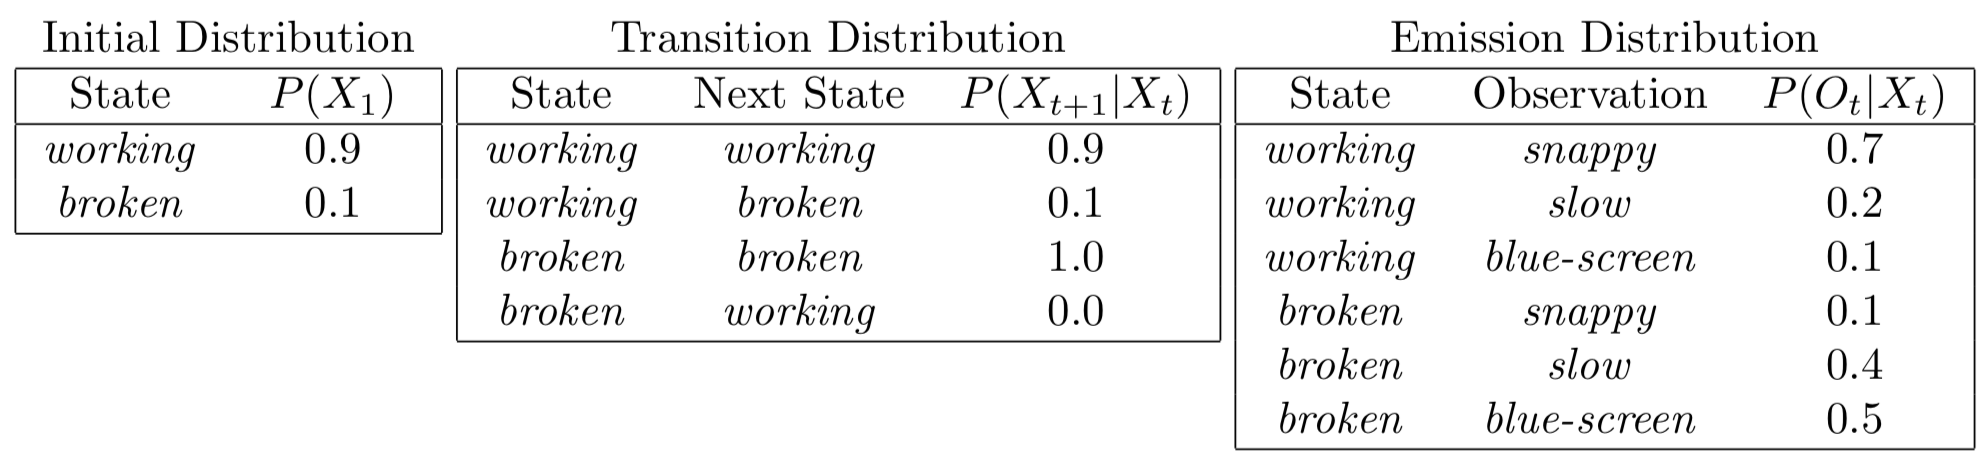


### (2a)
What is the posterior distribution of $X_1$, your computer's state on day one, given the observation (*slow*) on day 1? In other words, find $P(X_1 | E_1 = \textit{slow})$.

$P(X_1=working|O_1=slow) = \alpha*P(O_1=slow|X_1=working)P(X_1=working) = \alpha*.2*.9 = .18\alpha$\
$P(X_1=broken|O_1=slow) = \alpha*P(O_1=slow|X_1=broken)P(X_1=broken) = \alpha*.4*.1 = .04\alpha$\
$\alpha = \frac{1}{.18+.04} = 4.54545454$\
$P(X_1=working|O_1=slow) = .18\alpha = .8182$\
$P(X_1=broken|O_1=slow) = .04\alpha = .1818$
$=\begin{pmatrix} .8182 \\ .1818\end{pmatrix}$

### (2b)
What is the posterior distribution of $X_2$, your computer's state on day two, given the observation sequence (*slow*, *slow*)?

$P(X_2|O_{1:2}) = \alpha*P(O_2=slow|X_2)\sum\limits_{X_1}P(X_2|X_1)P(X_1|O_1=slow)$\
$=\alpha*\begin{pmatrix} .2 & 0 \\ 0 & .4\end{pmatrix}(P(X_2|X_1=broken)P(X_1=broken|O_1=slow)+P(X_2|X_1=working)P(X_1=working|O_1=slow))$\
$=\alpha*\begin{pmatrix} .2 & 0 \\ 0 & .4\end{pmatrix}(\begin{pmatrix} 0 \\ 1 \end{pmatrix}*.1818 + \begin{pmatrix} .9 \\ .1\end{pmatrix}*.8182)$\
$=\alpha*\begin{pmatrix} .2 & 0 \\ 0 & .4\end{pmatrix}(\begin{pmatrix} 0 \\ .1818 \end{pmatrix} + \begin{pmatrix} .73638 \\ .08182\end{pmatrix})$\
$=\alpha*\begin{pmatrix} .2 & 0 \\ 0 & .4\end{pmatrix}*\begin{pmatrix} .73638 \\ .26362\end{pmatrix}$\
$=\alpha*\begin{pmatrix} .147276 \\ .105448\end{pmatrix} \rightarrow \alpha = \frac{1}{.147276+.105448} = 3.9568857726$\
$=\begin{pmatrix} .582754309 \\ .417245691\end{pmatrix}$

<br>

---

## Problem 3: your very own MDP

For this problem, you do not need to write any code, but rather communicate your ideas clearly using complete sentences and descriptions of the concepts the questions ask about. You can, of course, include some pseudocode if it helps, but that is not strictly necessary.

### (3a)

Describe something you think would be interesting to model using a Markov decision process.  Be **creative** - do not use any examples from your homework, class, or the textbook, and if you are working with other students, please **come up with your own example**. There are so, SO many possible answers!

I will use the example of a person biking on a path that is riddled with potholes.

### (3b)

What are the states associated with your MDP?

The states will be quite simple, either being smooth road or pothole. I could, however, have two separate states that the agent could be in at once (one for each wheel of the bicycle).

### (3c)

What is the reward structure associated with your MDP?  Include a discussion of terminal/non-terminal states.

The reward structure would involve a mildly positive reward for smooth tiles, a large positive reward for moving forward, a slightly negative reward for moving in any direction except straight foward (directly left and directly right would be the most negatively rewarded movements possible), and a scaling negative reward for hitting a pothole (scales on the severity/size of the pothole).

Positive terminal states could take the form of the agent's home and possibly the homes of its friends (anywhere safe that the agent can disembark the bike).

Negative terminal states may not exist in the form of specific locations, but rather in terms of the condition of the agent's bike. If it receives enough negative reward score, the bike will no longer be usable.

### (3d)

What are the actions and transition model associated with your MDP?

The possible actions would involve forward, left, right, and varying degrees of diagonally forward/left and diagonally forward/right (the more severe the swerve, the more negative the reward).

The transition model would involve the probability that the bike properly goes in the desired direction (perhaps it has a couple screws loose and occasionally malfunctions), as well as the probability of encountering smooth/pothole tiles after one another (multiple potholes in a row would rarer than multiple smooth tiles in a row).

### (3e)

Interpret what an optimal policy represents in the context of your particular MDP.

An optimal policy guides the agent down a path that maximizes reward by avoiding potholes when possible, but not necessarily to the extent that the agent must regularly make severe swerves to avoid them.

## Unit test

In [16]:
class Tests_Problem1(unittest.TestCase):
    def setUp(self):
        nrow = 3
        ncol = 3
        default_reward = -0.2
        discount = 0.5
        terminal = {(1,3):-1, (1,2):2}
        self.mdp = MDP(nrow, ncol, terminal, default_reward, discount)
    def test_actions_some(self):
        self.assertEqual(set(self.mdp.actions((2,2))) == {'N','S','E','W'}, True)
    def test_actions_few(self):
        self.assertEqual(set(self.mdp.actions((1,1))) == {'N','E'}, True)
    def test_actions_none(self):
        self.assertEqual(set(self.mdp.actions((1,2))) == {None}, True)
    def test_reward_t(self):
        self.assertEqual(self.mdp.reward((1,2)) == 2, True)
    def test_reward_nt(self):
        self.assertEqual(self.mdp.reward((2,2)) == -0.2, True)
    def test_result_nt(self):
        self.assertEqual(self.mdp.result((1,1), 'N') == (1,2), True)